In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
advertising = pd.DataFrame(pd.read_csv("advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
# Checking Null values
advertising.isnull().sum()*100/advertising.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

### Data Visualization

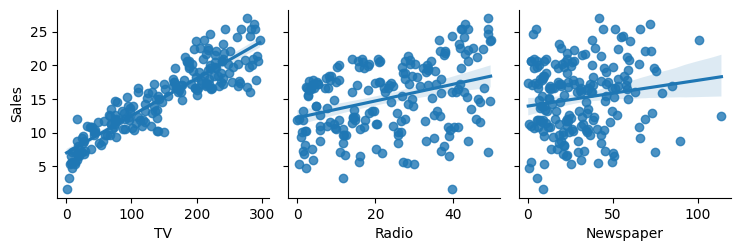

In [7]:
# Scatter plot to check the linearity assumption between each independent variable(TV,Radio,Newspaper ) and
# dependent variable(Sales)

sns.pairplot(advertising,x_vars=["TV","Radio","Newspaper"],y_vars="Sales", kind="reg")

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

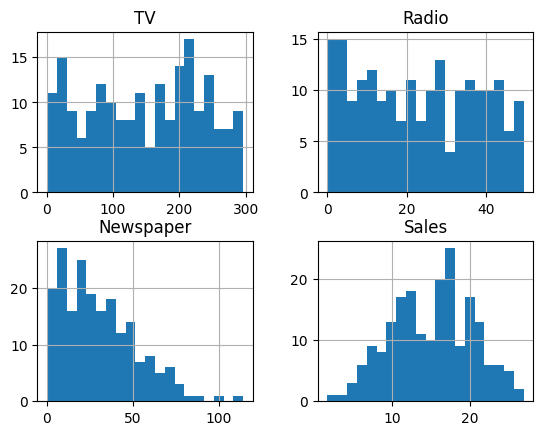

In [8]:
# Histogram to check the normality assumption of the dependent variable
advertising.hist(bins=20)

In [9]:
advertising.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
X=advertising[['TV', 'Radio', 'Newspaper']]
y=advertising['Sales']

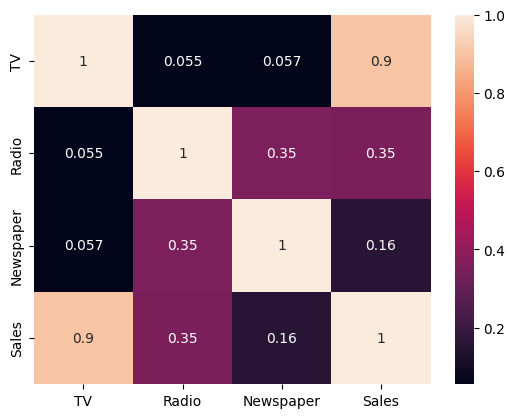

In [11]:
# Correlation Heatmap to check for multicollinearity among independent/dependent variables
sns.heatmap(advertising.corr(), annot = True)
plt.show()

## Model Building


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((140, 3), (60, 3), (140,), (60,))

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [16]:
y_predict=model.predict(X_test)

In [17]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


In [18]:
score=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
mse=mean_squared_error(y_test,y_predict)
print("R2 score is ",score)
print("Mean absolute error is ",mae)
print("Mean squared error ",mse)

R2 score is  0.8655979373420272
Mean absolute error is  1.2278183566589411
Mean squared error  2.6360765623280655


In [19]:
# Evaluate the model
results=[]
names=[]

In [20]:
# Defines a list of model to evaluate

models=[('LinerRegression',LinearRegression())]

In [21]:
import pickle

In [22]:
# Loop thorugh each model,fit it to the data,and calculate the RMSE
for name,model in models:
    model.fit(X_train,y_train)
    y_predict=model.predict(X_test)
    result=np.sqrt(mean_squared_error(y_test,y_predict))
    results.append(result)
    names.append(name)
    msg="%s:%f" % (name,result)
    print(msg)

LinerRegression:1.623600


In [24]:
# Making prediction on new data
new_data=pd.DataFrame({'TV':[100],'Radio':[50],'Newspaper':[25]})
Predicted_sales=model.predict(new_data)
print("Predicted Sales:",Predicted_sales)

Predicted Sales: [15.37536768]


In [25]:
import joblib

In [26]:
joblib.dump(model,'sales.pkl')

['sales.pkl']

In [27]:
from flask import Flask
from flask import render_template
import joblib
from flask import request

In [28]:
app=Flask(__name__)
model=joblib.load('sales.pkl')
@app.route('/')
def hello(name=None):
    return render_template("index.html",name=name)

@app.route('/result',methods=['GET','POST'])
def get_value():
    if request.method=="POST":
        tv=float(request.form.get('tv'))
        radio=int(request.form.get('radio'))
        newspaper=int(request.form.get('newspaper'))
        predict=model.predict([[tv,radio,newspaper]])
        print(predict[0])
    
    return render_template("result.html",prediction=[predict[0]])
    


In [ ]:
if __name__=="__main__":
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
